## Libraries Import
- Import necessary libraries for data analysis and visualization.

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
import statsmodels.api as sm
import math

## Upload and Read from File
- Load the dataset from a file for analysis.
- Display the first few rows and data shape of the dataset to understand its structure.


In [54]:

from google.colab import files
upload= files.upload()


Saving Social Media and Mental Health.csv to Social Media and Mental Health.csv


In [55]:
# Load the dataset
data= pd.read_csv('Social Media and Mental Health.csv')


In [56]:
# Dimension of data shape is a s follows -
data.shape

(481, 21)

In [57]:
# Printing first 5 entries in the data set
data.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


## Data Set Cleaning
- Handle missing values and remove duplicates.
- Format and standardize columns for consistency.
- Ensure the dataset is ready for analysis.

In [58]:
data.rename(columns = {'1. What is your age?':'Age','2. Gender':'Gender','3. Relationship Status':'Relationship Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social Media User',
                       '7. What social media platforms do you commonly use?':'Platforms Used',
                       '8. What is the average time you spend on social media every day?':'Time Spent',
                       '9. How often do you find yourself using Social media without a specific purpose?':'ADHD Q1',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'ADHD Q2',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Anxiety Q1',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'ADHD Q3',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxiety Q2',
                       '14. Do you find it difficult to concentrate on things?':'ADHD Q4',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self Esteem Q1',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Self Esteem Q2',
                       '17. How often do you look to seek validation from features of social media?':'Self Esteem Q3',
                       '18. How often do you feel depressed or down?':'Depression Q1',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression Q2',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression Q3' },inplace=True)

In [59]:
titles = list(data.columns)
titles

['Timestamp',
 'Age',
 'Gender',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User',
 'Platforms Used',
 'Time Spent',
 'ADHD Q1',
 'ADHD Q2',
 'Anxiety Q1',
 'ADHD Q3',
 'Anxiety Q2',
 'ADHD Q4',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

In [60]:
#rearranging ADHD and anxiety question columns so that they are sequential

titles[11], titles[12] = titles[12], titles[11]
titles[12], titles[14] = titles[14], titles[12]
titles[13], titles[14] = titles[14], titles[13]
data = data[titles]
titles


['Timestamp',
 'Age',
 'Gender',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User',
 'Platforms Used',
 'Time Spent',
 'ADHD Q1',
 'ADHD Q2',
 'ADHD Q3',
 'ADHD Q4',
 'Anxiety Q1',
 'Anxiety Q2',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

In [61]:
data.drop(data.loc[data['Gender'] =='There are others???'].index, inplace=True)

In [62]:
# Applying replacements
data['Gender'].replace(['Non-binary', 'Nonbinary ', 'NB', 'unsure ', 'Non binary ', 'Trans'], 'Others', inplace=True)

In [63]:
Genders = set(data['Gender'])
print(Genders)

{'Female', 'Others', 'Male'}


In [64]:
data.describe()

,Age,ADHD Q1,ADHD Q2,ADHD Q3,ADHD Q4,Anxiety Q1,Anxiety Q2,Self Esteem Q1,Self Esteem Q2,Self Esteem Q3,Depression Q1,Depression Q2,Depression Q3
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,26.145208,3.552083,3.316667,3.345833,3.245833,2.583333,3.564583,2.831250,2.772917,2.456250,3.260417,3.172917,3.206250
std,9.923651,1.097252,1.327300,1.174353,1.348464,1.253527,1.279351,1.409283,1.056097,1.248867,1.310347,1.256838,1.459675
min,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,22.000000,4.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,26.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,91.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [65]:
data.loc[:, 'Age'] = data['Age'].astype(int)

In [66]:
#Summing scores from ADHD, Anxiety, Self Esteem and Depression individually and creating a new column

ADHD = ['ADHD Q1', 'ADHD Q2', 'ADHD Q3', 'ADHD Q4']
data['ADHD Score'] = data[ADHD].sum(axis=1)

Anxiety = ['Anxiety Q1', 'Anxiety Q2']
data['Anxiety Score'] = data[Anxiety].sum(axis=1)

SelfEsteem = ['Self Esteem Q1', 'Self Esteem Q2','Self Esteem Q3']
data['Self Esteem Score'] = data[SelfEsteem].sum(axis=1)

Depression = ['Depression Q1', 'Depression Q2','Depression Q3']
data['Depression Score'] = data[Depression].sum(axis=1)

Total = ['ADHD Score', 'Anxiety Score','Self Esteem Score','Depression Score']
data['Total Score'] = data[Total].sum(axis=1)

#Deleting question columns and timestamp columns as they are no longer used
data.drop(data.iloc[:, 9:21], inplace = True, axis = 1)
data.drop(['Timestamp'], inplace = True, axis = 1)

In [67]:
data['Time Spent'] = data['Time Spent'].replace({
    'Less than an Hour': 0,
    'Between 1 and 2 hours': 1,
    'Between 2 and 3 hours': 2,
    'Between 3 and 4 hours': 3,
    'Between 4 and 5 hours': 4,
    'More than 5 hours': 5
})

## Visualization
- Created charts and graphs to represent the data visually.
- Showcased important patterns and relationships in the data.

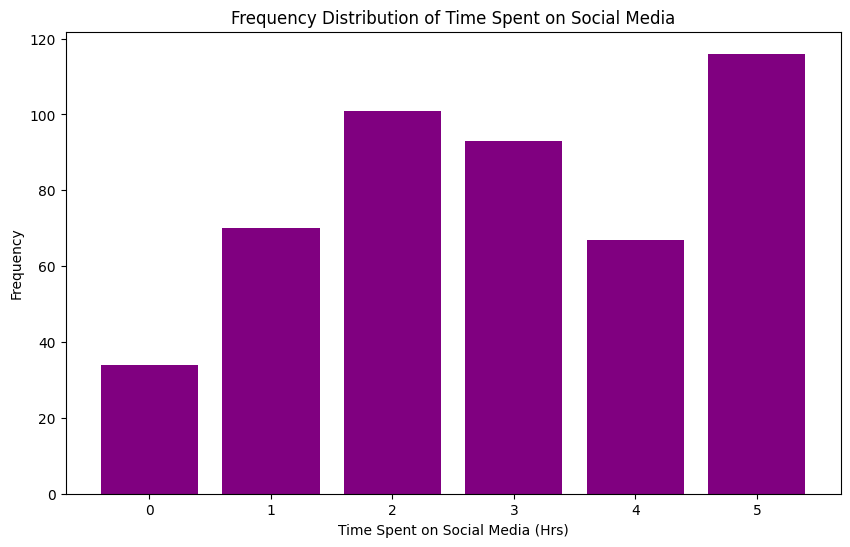

In [68]:
frequency_time_spent = {
    0: 34,
    1: 70,
    2: 101,
    3: 93,
    4: 67,
    5: 116
}

# Convert to sorted list of tuples
sorted_frequency_time_spent = sorted(frequency_time_spent.items())

# Separate keys and values for plotting
labels, values = zip(*sorted_frequency_time_spent)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='purple')
plt.xlabel('Time Spent on Social Media (Hrs)')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Time Spent on Social Media')
plt.show()

From the above plot, we can infer that in the sample, there are less than 40 people who have an average social media use of less than an hour. The other groups each have 60 to 120 people with average social media use of 1 to 5 hours or more.


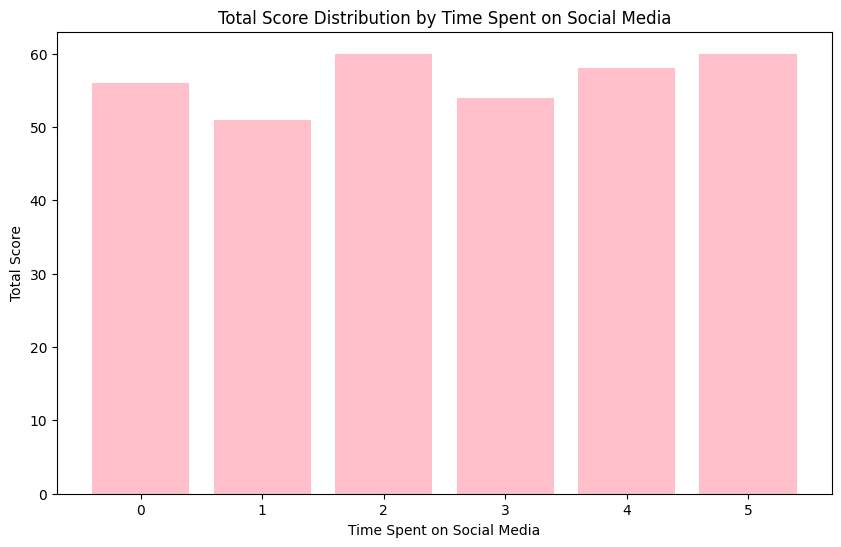

In [69]:
data['Total Score'] = data[['Anxiety Score', 'Depression Score', 'Self Esteem Score', 'ADHD Score']].sum(axis=1)

# Define a function to convert time spent to the desired format
def convert_time(time_spent):
    if time_spent == "Less than an Hour":
        return "0-1 hours"
    elif time_spent == "Between 1 and 2 hours":
        return "1-2 hours"
    elif time_spent == "Between 2 and 3 hours":
        return "2-3 hours"
    elif time_spent == "Between 3 and 4 hours":
        return "3-4 hours"
    elif time_spent == "Between 4 and 5 hours":
        return "4-5 hours"
    elif time_spent == "More than 5 hours":
        return "5++ hours"
    else:
        return time_spent  # Handles unexpected values

# Apply the conversion function to the 'Time Spent' column
data['Time Spent'] = data['Time Spent'].apply(convert_time)

# Ensure 'Time Spent' is treated as a categorical variable for plotting
data['Time Spent'] = data['Time Spent'].astype('category')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(data['Time Spent'], data['Total Score'], color='pink')
plt.xlabel('Time Spent on Social Media')
plt.ylabel('Total Score')
plt.title('Total Score Distribution by Time Spent on Social Media')
plt.show()

The bar chart shows that individuals who spend 2, 4, and 5 units of time on social media have higher total scores compared to those spending 1 and 3 units

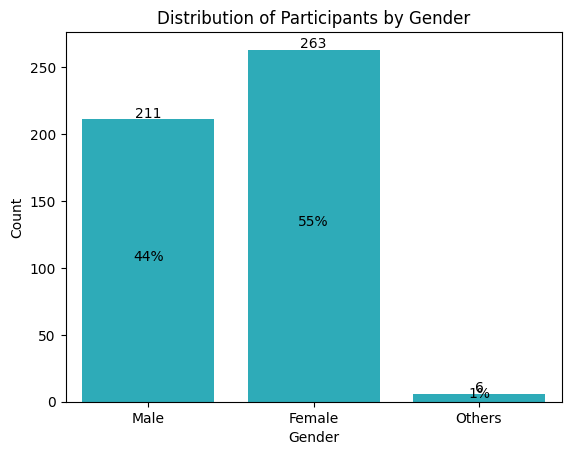

In [70]:
total = float(len(data))
ax = sns.countplot(x="Gender", data=data, color=sns.color_palette()[9])
ax.set_ylabel('Count')
ax.set_title('Distribution of Participants by Gender')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1.5, '{0:.0f}'.format(height), ha="center")
    ax.text(p.get_x() + p.get_width() / 2, height / 2, '{0:.0%}'.format(height / total), ha="center")

plt.show()

Approximately 260 participants out of 473 are female, making up the majority in the sample. 'Others' make up approximately 1% of the sample size, which makes it impossible to make statistical inferences based on the "Other" category specifically.

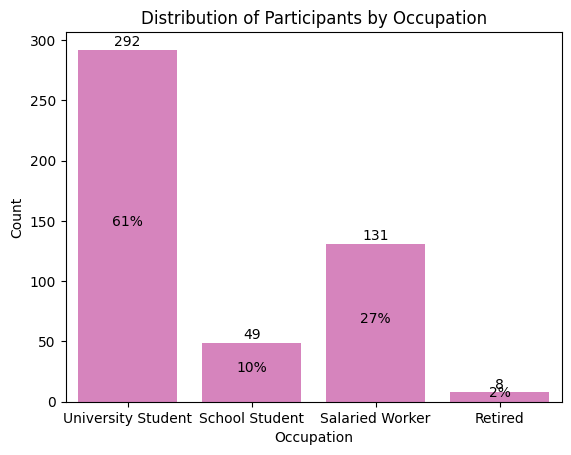

In [71]:
total = float(len(data))
ax = sns.countplot(x="Occupation", data=data, color=sns.color_palette()[6])
ax.set_ylabel('Count')
ax.set_title('Distribution of Participants by Occupation')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 3, '{0:.0f}'.format(height), ha="center")
    ax.text(p.get_x() + p.get_width() / 2, height / 2, '{0:.0%}'.format(height / total), ha="center")

plt.show()

The sample is over-representated by University students, making up an overwhelming 62% of the sample.

### Data Cleaning to help in visualization
- Further refine the dataset for better visual representation.
- Prepare specific columns and data points for visualization purposes.

In [72]:
#Converting Time Spent from object type to int64.
data['Time Spent'] = data['Time Spent'].astype('int64')

In [73]:
relationship_mapping = {
    'Single': 0,
    'Married': 1,
    'Divorced': 2,
    'In a relationship':3
}

social_media_mapping = {
    'Yes': 1,
    'No': 0
}

Gender_mapping= {
    'Male':0,
    'Femala':1
}
# Apply the mappings
data['Relationship Status'] = data['Relationship Status'].replace(relationship_mapping)
data['Social Media User'] = data['Social Media User'].replace(social_media_mapping)



In [74]:
# Convert to numeric to ensure there are no hidden strings
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Depression Score'] = pd.to_numeric(data['Depression Score'], errors='coerce')
data['Relationship Status'] = pd.to_numeric(data['Relationship Status'], errors='coerce')
data['Social Media User'] = pd.to_numeric(data['Social Media User'], errors='coerce')
relationship_mapping = {
    'Single': 0,
    'Married': 1,
    'Divorced': 2,
    'In a relationship':3
}

social_media_mapping = {
    'Yes': 1,
    'No': 0
}

Gender_mapping= {
    'Male':0,
    'Femala':1
}
# Apply the mappings
data['Relationship Status'] = data['Relationship Status'].replace(relationship_mapping)
data['Social Media User'] = data['Social Media User'].replace(social_media_mapping)



## Heat Map to find the possible correlations in the data set
- Generate a heat map to identify correlations between different variables.
- Highlight significant correlations and discuss their implications.

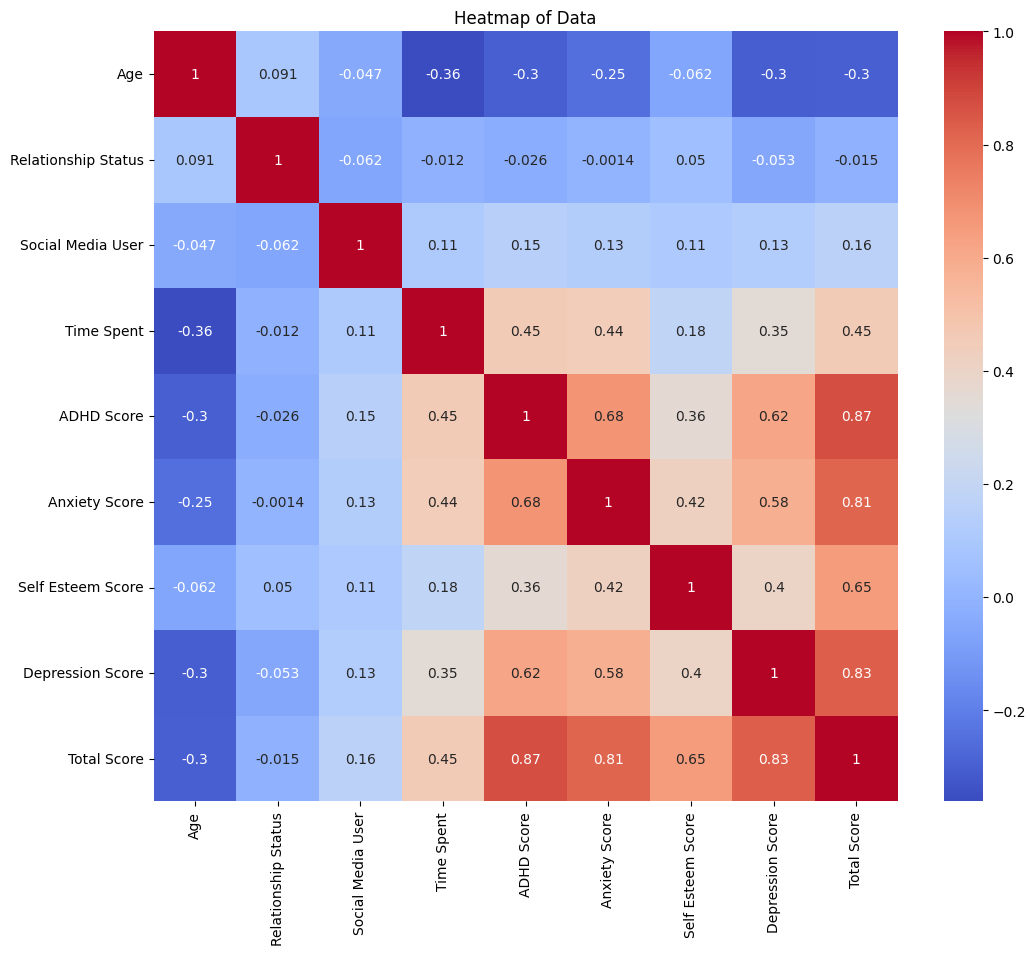

In [75]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])
# Create a larger plot
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')

# Set the title
plt.title('Heatmap of Data')

# Display the plot
plt.show()


## Here is the analysis of the 1st Hypothesis
- Present the hypothesis and the methodology used to test it.
- Analyze the results and interpret the findings.
- Discuss whether the hypothesis is supported or not.

Null Hypothesis (H0): Increased time spent on social media does not lead to an increase in mental health issues among different groups.
Alternative Hypothesis (H1): Increased time spent on social media leads to an increase in mental health issues among different groups.


In [76]:
# Verify the count of data points in each group
group_counts = data['Total Score'].value_counts()

# Filter out groups with no data
valid_groups = group_counts[group_counts > 0].index

# Prepare the list of groups for ANOVA
time_spent_groups = [data[data['Total Score'] == group]['Time Spent'] for group in valid_groups]

# Ensure all groups have data
time_spent_groups = [group for group in time_spent_groups if len(group) > 0]

# Perform ANOVA
f_value, p_value = stats.f_oneway(*time_spent_groups)

# Output the F-value and p-value to see if there are significant differences
print("F-value:", f_value)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a statistically significant difference in Time Spent across Mental health issues.")
else:
    print("There is no statistically significant difference in Time Spent across Mental health issues.")

F-value: 3.677861625970449
P-value: 6.39865151740502e-13
There is a statistically significant difference in Time Spent across Mental health issues.


Coefficient for Time Spent on Social Media: 2.667994020020533
P-value: 9.144738799299639e-26
R-squared: 0.205981586322048


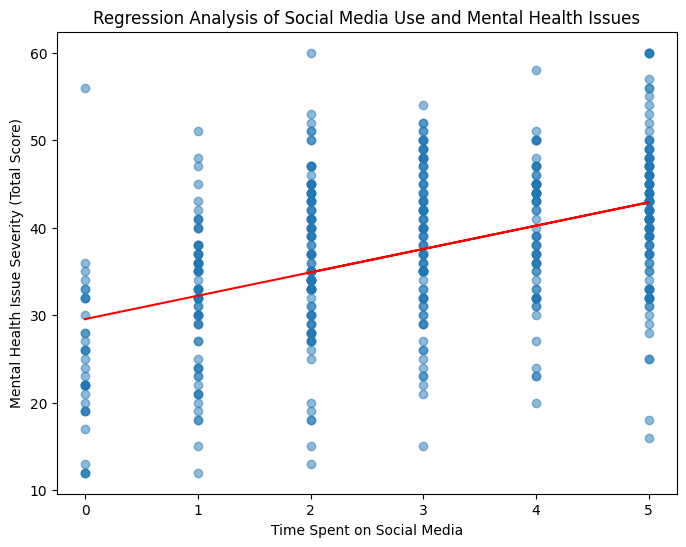

In [77]:
# Prepare the data for regression
X = data[['Time Spent']]  # Independent variable
y = data['Total Score']  # Dependent variable

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Extract the regression results
coefficients = model.params
p_values = model.pvalues
r_squared = model.rsquared

# Print the key results
print(f"Coefficient for Time Spent on Social Media: {coefficients['Time Spent']}")
print(f"P-value: {p_values['Time Spent']}")
print(f"R-squared: {r_squared}")

# Plotting the regression line
plt.figure(figsize=(8, 6))
plt.scatter(data['Time Spent'], data['Total Score'], alpha=0.5)
plt.plot(data['Time Spent'], model.predict(X), color='red')
plt.xlabel('Time Spent on Social Media')
plt.ylabel('Mental Health Issue Severity (Total Score)')
plt.title('Regression Analysis of Social Media Use and Mental Health Issues')
plt.show()


## Here is the analysis of the 2nd Hypothesis
- Present the second hypothesis and the methodology used to test it.
- Analyze the results and interpret the findings.
- Discuss whether the hypothesis is supported or not.

Null Hypothesis (H0): There is no positive correlation between any of the pairs of mental health issues (Anxiety, Depression, and Self-Esteem) among participants.
Alternative Hypothesis (H1): There is a positive correlation between at least one pair of mental health issues (Anxiety, Depression, and Self-Esteem) among participants.


Correlation between ADHD Score and Anxiety Score: 0.6762068183656027
Correlation between Self Esteem Score and Depression Score: 0.4022433619193625


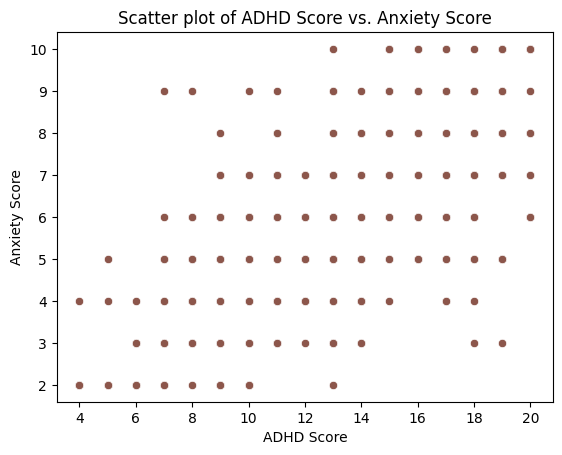

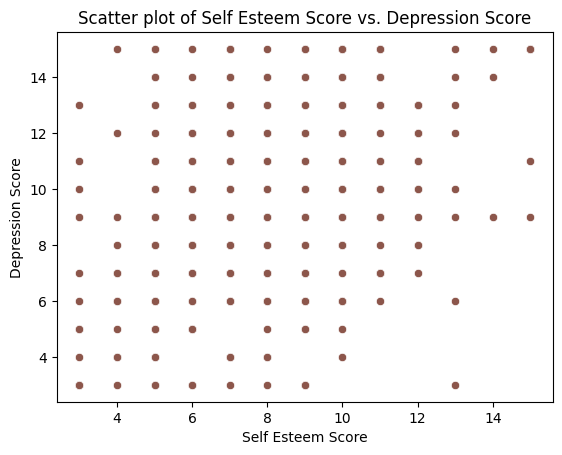

In [78]:
correlation_stress = data['ADHD Score'].corr(data['Anxiety Score'])
correlation_mood = data['Self Esteem Score'].corr(data['Depression Score'])


print("Correlation between ADHD Score and Anxiety Score:", correlation_stress)
print("Correlation between Self Esteem Score and Depression Score:", correlation_mood)

# Plot
sns.scatterplot(x='ADHD Score', y='Anxiety Score', data=data,color=sns.color_palette()[5])
plt.title('Scatter plot of ADHD Score vs. Anxiety Score')
plt.show()

sns.scatterplot(x='Self Esteem Score', y='Depression Score', data=data,color=sns.color_palette()[5])
plt.title('Scatter plot of Self Esteem Score vs. Depression Score')
plt.show()


In [79]:
contingency_table = pd.crosstab(data['ADHD Score'], data['Anxiety Score'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Test: chi2={chi2}, p-value={p}')

if p < 0.05:  # This is a common threshold for statistical significance
    print("There is a statistically significant association between ADHD Score and Anxiety Score.")
else:
    print("There is not enough evidence to conclude a statistically significant association between ADHD Score and Anxiety Score.")


correlation, p_value = stats.pearsonr(data['Anxiety Score'], data ['ADHD Score'])

# Print the results
print("Correlation coefficient:", correlation)
print("p-value:", p_value)


Chi-Square Test: chi2=591.2830626873806, p-value=1.1724077531307608e-60
There is a statistically significant association between ADHD Score and Anxiety Score.
Correlation coefficient: 0.6762068183656027
p-value: 1.991265780653397e-65


In [80]:
contingency_table = pd.crosstab(data['Self Esteem Score'], data['Depression Score'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Test: chi2={chi2}, p-value={p}')

if p < 0.05:
    print("There is a statistically significant association between Self Esteem Score and Depression Score.")
else:
    print("There is not enough evidence to conclude a statistically significant association between Self Esteem Score and Depression Score.")
correlation, p_value = stats.pearsonr(data['Self Esteem Score'], data ['Depression Score'])

# Print the results
print("Correlation coefficient:", correlation)
print("p-value:", p_value)

Chi-Square Test: chi2=337.1642474707411, p-value=1.56311286026107e-17
There is a statistically significant association between Self Esteem Score and Depression Score.
Correlation coefficient: 0.40224336191936266
p-value: 4.2960255338312135e-20
